# Exercise 8: Hypothesis Testing 



## Table of Contents

* Parametric tests
    * one-sample t-test
    * paired t-test
    * two-sample t-test
    * ANOVA
* Testing parametric assumptions
    * Verifying assumptions
    * Modifying data 
* Non-parametric tests
    * Signed-rank tests
    * Bootstrapping
    * Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

## Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm
#import dabest as db

# For retina displays only 
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%matplotlib inline

## Parametric tests

### one-sample t-test

In [6]:
# Generating data 
Y = np.random.normal(loc=3, scale=2, size=100)

df_one_samp = pd.DataFrame(data = {'Y': Y})
df_one_samp

,Y
0,4.118833
1,2.475613
2,3.519373
3,5.008255
4,0.538244
...,...
95,3.302558
96,0.571902
97,1.692855
98,5.009566


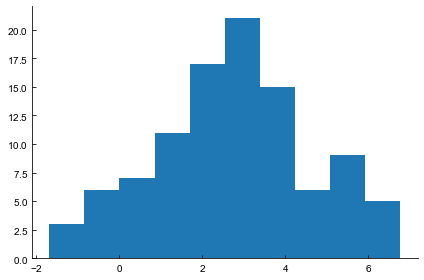

In [10]:
fig, ax = plt.subplots()
_ = ax.hist(Y, bins=10)

In [15]:
# Excersise: What do you expect for pvalue if popmean = 3? What happens as you move away from 3? 

sps.ttest_1samp(Y, popmean=2, alternative="greater")

TypeError: ttest_1samp() got an unexpected keyword argument 'alternative'

In [ ]:
# Exersise: find p value by using statsmodels and thinking about the test as a model



### Paired t-test

In [16]:
# Generating data 
N = 100
X1 = np.random.normal(loc=0, scale=2, size=N)
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)


(array([ 1.,  3.,  6., 15., 11., 21., 21., 10., 10.,  2.]),
 array([-3.92697386, -2.7894673 , -1.65196074, -0.51445418,  0.62305237,
         1.76055893,  2.89806549,  4.03557205,  5.1730786 ,  6.31058516,
         7.44809172]),
 <BarContainer object of 10 artists>)

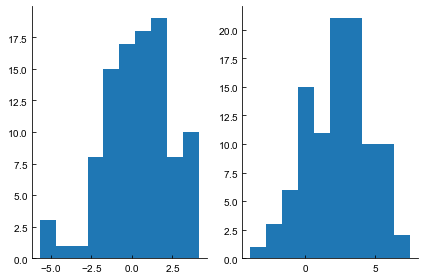

In [23]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(X1)
ax[1].hist(X2)

In [24]:
sps.ttest_rel(X1, X2)

Ttest_relResult(statistic=-20.99006361317211, pvalue=3.1127735909325794e-38)

In [26]:
# Exercise: Use ttest_1samp amd show that you get the same result if you do one-way t-test of the difference


sps.ttest_1samp(X2 - X1, popmean=0)


Ttest_1sampResult(statistic=20.99006361317211, pvalue=3.1127735909325794e-38)

### Two-sample t-test 

In [10]:
# Generating data 
N = 100
effect_size = 1 
std_dev = 2
X1 = np.random.normal(loc=0, scale=std_dev, size=N)
X2 = np.random.normal(loc=effect_size, scale=std_dev, size=N)

df = pd.DataFrame({'X1': X1, 'X2': X2})
df_melt = df.melt(value_vars=['X1', 'X2'], var_name='Group', value_name='X')

In [ ]:
sps.ttest_ind(X1, X2)

In [ ]:
# Exersise: find p value by using statsmodels and thinking about the test as a model



### ANOVA

In [ ]:
# Generating data 
N = 100
effect_size_2 = 1
effect_size_3 = -3
std_dev = 2
X1 = np.random.normal(loc=0, scale=std_dev, size=N)
X2 = np.random.normal(loc=effect_size_2, scale=std_dev, size=N)
X3 = np.random.normal(loc=effect_size_3, scale=std_dev, size=N)

In [ ]:
sps.f_oneway(X1, X2, X3)

In [ ]:
# Exersise (tougher): find p value by using statsmodels and thinking about the test as a model



## Testing non-parametic assumptions

In [ ]:
# Exercise: Generate some non-gaussian data, make sure you know how to specify the mean of
# the population and your sample size










In [ ]:
# Exercise: Test it ASSUMING it meets assumptions of parametric tests. 
# Do you get the correct result?
# 1. Play around with sample size, variances, etc. 
# 2. If you are feeling really into it, draw a graph showing what happens as one population gets 
# further and further from normal. 







In [ ]:
# Exercise: Look up one of the following and apply it to your data: 
# 
# Data are normally distributed
#    D’Agostino-Pearson
#    Shapiro-Wilk
#    Kolmogorov-Smirnov
#    Lilliefors Test
# Equal variance between groups
#    Levene’s Test





## Non-parametric tests

### Signed-rank tests

#### Wilcoxon sign-test

In [ ]:
# Generating non-normal data
Y = np.exp(np.random.randn(100))
Y = Y - Y.mean()

In [ ]:
# Plotting data
fig, ax = plt.subplots()
x, c, _ = ax.hist(Y, bins=10)

In [ ]:
# Testing for normality
sps.normaltest(Y)

In [ ]:
# Testing if mean is different from 0 
sps.wilcoxon(Y)

In [ ]:
# Using 
signed_rank_Y = np.sign(Y)*sps.rankdata(Y)
sps.ttest_1samp(signed_rank_Y, popmean=0)

In [ ]:
signed_rank_df = pd.DataFrame({'Y': signed_rank_Y})
smf.ols("Y ~ 1", data=signed_rank_df).fit().pvalues[0]

#### Wilcoxon signed-rank test 

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)

In [ ]:
sps.wilcoxon(X1, X2)

#### Mann-Whitney U

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = np.exp(np.random.normal(loc=2, scale=1, size=N))

In [ ]:
sps.mannwhitneyu(X1, X2)

In [ ]:
# Exercise: Compare p values obtained using a t-test and a rank test for 
# NORMAL data that does satisfy parametric assumptions 








### Bootstrapping and estimation plots

#### One-sample

In [ ]:
Y = np.random.uniform(size=100) - 0.4

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y. Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means = []
for i in range(N_rep):
    ???

#### Independant samples

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y1)
b, c, _ = ax.hist(Y2)

In [ ]:
# Exercise: Write a loop to generate N_rep sample means from Y1 and . Use these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means_1 = []
sample_means_2 = []
for i in range(N_rep):
    ???

how_often_s1_larger = [s1 > s2 for s1 in sample_means_1 for s2 in sample_means_2]
p_value = np.sum(how_often_s1_larger) / len(how_often_s1_larger)

### Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

df = pd.DataFrame({'Control 1': Y1, 'Test 1': Y2})

In [ ]:
two_groups_unpaired = db.load(df, idx=("Control 1", "Test 1"), paired=False, id_col="ID")

In [ ]:
two_groups_unpaired.mean_diff.plot()

In [ ]:
two_groups_unpaired.hedges_g.plot()
plt.savefig('./dabest.png')